<h2 style = 'background-color:teal;padding:10px;color:white;border-radius:10px;text-align:center;margin-left:150px;margin-right:170px;'> Inflation Forecast </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('seaborn-darkgrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(15, 5),
    titlesize=20,
    titleweight='bold'
)
%config InlineBackend.figure_format = 'retina'

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:600px'> Loading, cleaning and undestanding CPI data </h3>

In [5]:
# loading inflation data
infla_df = pd.read_excel('infla.xls')

In [6]:
# transforming data
infla_df.columns = infla_df.iloc[2:3:,::].values[0]
infla_mw = infla_df.loc[infla_df['Country Name'] == 'Malawi'].dropna(axis = 'columns')
infla_mw = infla_mw.iloc[::,4::]
infla_mw = infla_mw.T
infla_mw.columns = ['Inflation_rate']

In [7]:
infla_mw.head()

,Inflation_rate
1981.0,11.814698
1982.0,9.821162
1983.0,13.502511
1984.0,20.026303
1985.0,10.518976


In [8]:
infla_mw.tail()

,Inflation_rate
2018.0,12.420178
2019.0,9.370836
2020.0,8.625515
2021.0,9.330144
2022.0,20.953970


In [9]:
# info on data
infla_mw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1981.0 to 2022.0
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Inflation_rate  42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [10]:
# data summary
infla_mw.describe()

,Inflation_rate
count,42.000000
mean,19.218630
std,13.741254
min,7.411591
25%,9.995616
50%,14.010581
75%,23.506692
max,83.325775


In [11]:
# converting index to datetime
infla_mw.index = pd.to_datetime([str(int(i)) + '-12-31' for i in infla_mw.index])

In [12]:
infla_mw.head()

,Inflation_rate
1981-12-31,11.814698
1982-12-31,9.821162
1983-12-31,13.502511
1984-12-31,20.026303
1985-12-31,10.518976


In [13]:
infla_mw.tail()

,Inflation_rate
2018-12-31,12.420178
2019-12-31,9.370836
2020-12-31,8.625515
2021-12-31,9.330144
2022-12-31,20.953970


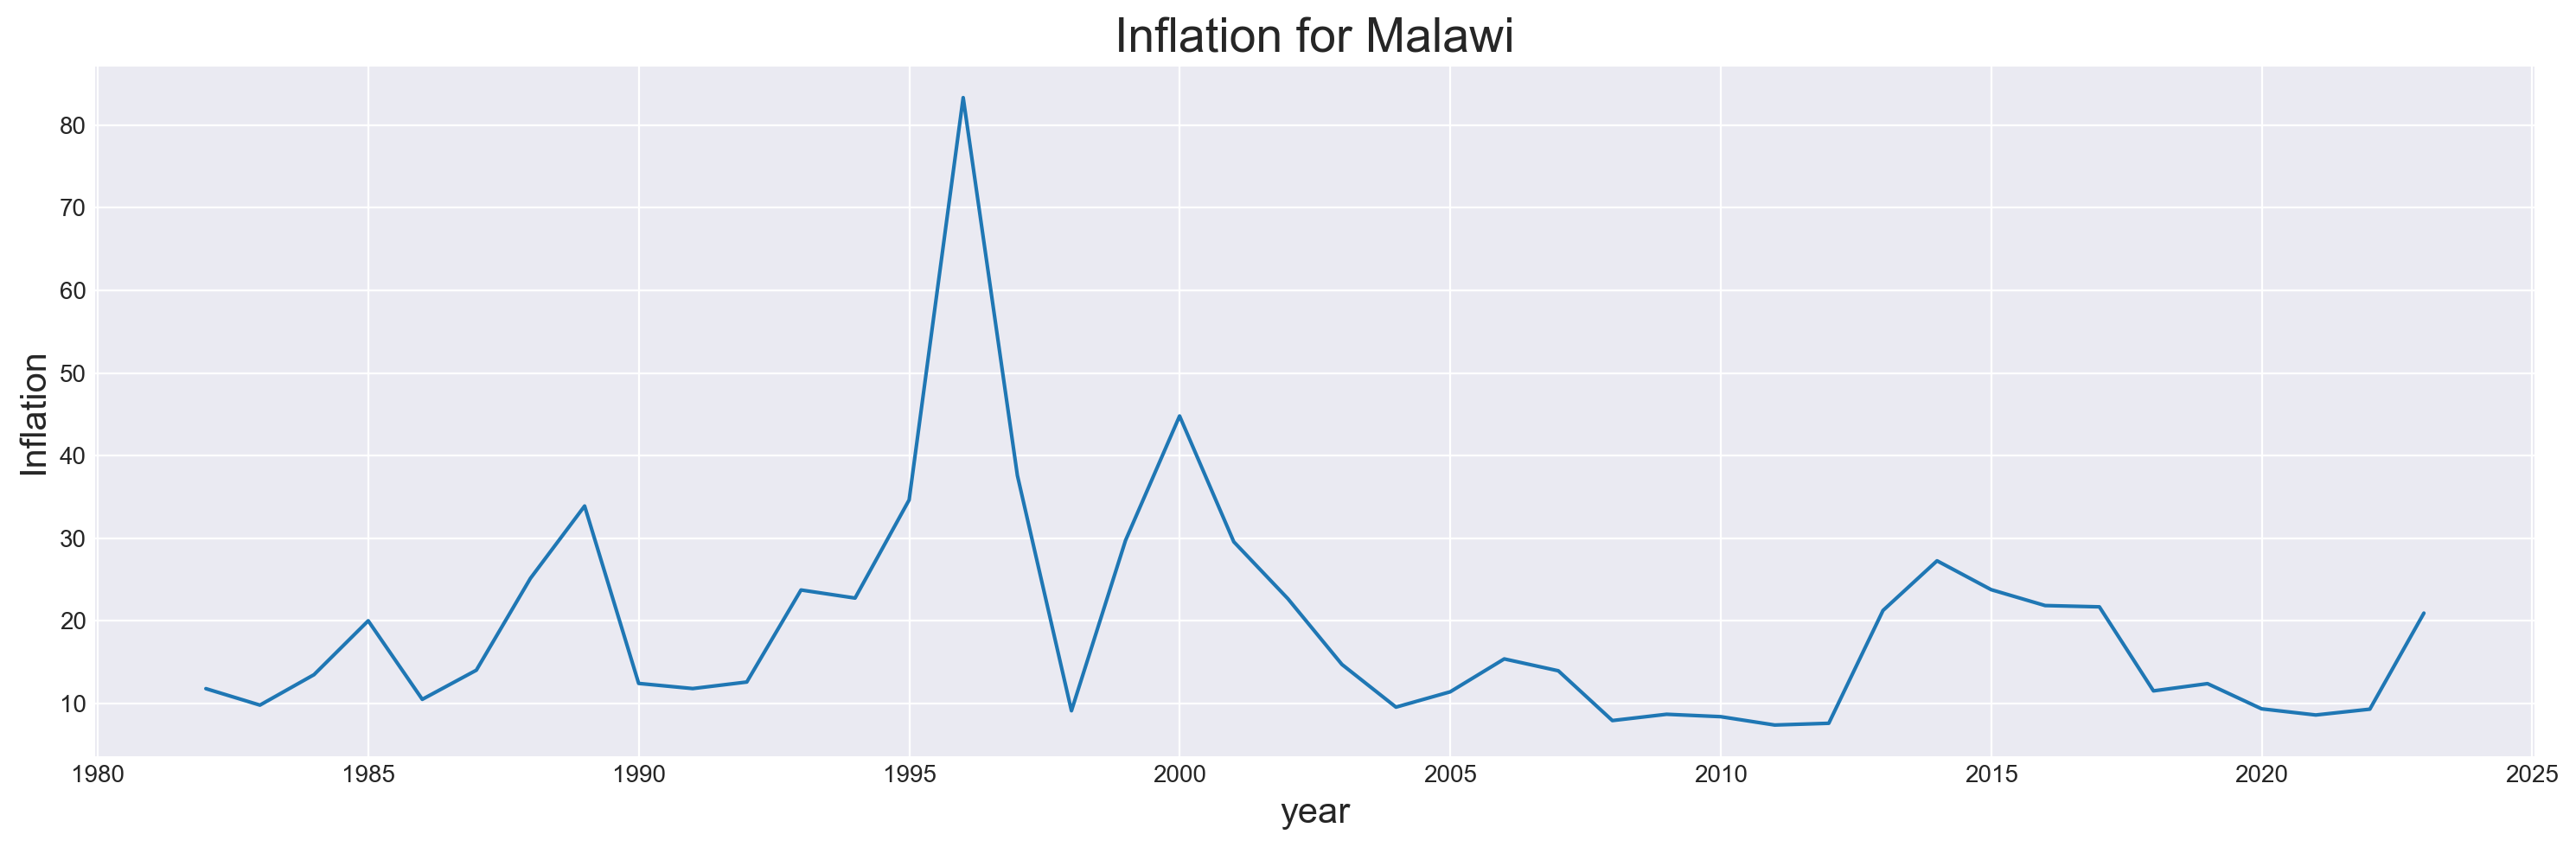

In [14]:
plt.plot(infla_mw)
plt.title('Inflation for Malawi',size = 20)
plt.xlabel('year',size = 15)
plt.ylabel('Inflation',size =15)
plt.show()

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Checking stationarity (A) </h3>

#### Null hypothesis : Time series is not stationary
#### Alt hypothesis  : Time series is stationary

In [15]:
result = adfuller(infla_mw.Inflation_rate) # applying augmented dicky fuller test

In [16]:
test_statistic,p_value,critical_values = result[0],result[1],result[4]

In [17]:
test_statistic

-2.349398158179712

In [18]:
p_value

0.15653040963605208

In [19]:
critical_values

{'1%': -3.610399601308181,
 '5%': -2.939108945868946,
 '10%': -2.6080629651545038}

In [20]:
p_value < 0.05 # p-value is greater than significance value. Therefore we fail to reject the null hypothesis

False

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Making TS stationary </h3>

In [21]:
# log transformation
np.log(infla_mw.Inflation_rate)

1981-12-31    2.469344
1982-12-31    2.284539
1983-12-31    2.602876
1984-12-31    2.997047
1985-12-31    2.353181
1986-12-31    2.642399
1987-12-31    3.225060
1988-12-31    3.523774
1989-12-31    2.521428
1990-12-31    2.470092
1991-12-31    2.534912
1992-12-31    3.167639
1993-12-31    3.125563
1994-12-31    3.545287
1995-12-31    4.422758
1996-12-31    3.627058
1997-12-31    2.212371
1998-12-31    3.392784
1999-12-31    3.802301
2000-12-31    3.387149
2001-12-31    3.122365
2002-12-31    2.690879
2003-12-31    2.259343
2004-12-31    2.436225
2005-12-31    2.735039
2006-12-31    2.637220
2007-12-31    2.073450
2008-12-31    2.164770
2009-12-31    2.130853
2010-12-31    2.003045
2011-12-31    2.031147
2012-12-31    3.057357
2013-12-31    3.306276
2014-12-31    3.169352
2015-12-31    3.084995
2016-12-31    3.077824
2017-12-31    2.446113
2018-12-31    2.519322
2019-12-31    2.237602
2020-12-31    2.154725
2021-12-31    2.233250
2022-12-31    3.042328
Name: Inflation_rate, dtype: float

In [22]:
# making data stationary through log transformation and differencing

infla_mw['Diff'] = np.log(infla_mw.Inflation_rate).diff()

In [23]:
infla_mw.head()

,Inflation_rate,Diff
1981-12-31,11.814698,NaN
1982-12-31,9.821162,-0.184805
1983-12-31,13.502511,0.318336
1984-12-31,20.026303,0.394171
1985-12-31,10.518976,-0.643866


In [24]:
infla_mw.tail()

,Inflation_rate,Diff
2018-12-31,12.420178,0.073209
2019-12-31,9.370836,-0.281720
2020-12-31,8.625515,-0.082878
2021-12-31,9.330144,0.078526
2022-12-31,20.953970,0.809078


In [25]:
infla_mw

,Inflation_rate,Diff
1981-12-31,11.814698,NaN
1982-12-31,9.821162,-0.184805
1983-12-31,13.502511,0.318336
1984-12-31,20.026303,0.394171
1985-12-31,10.518976,-0.643866
1986-12-31,14.046868,0.289219
1987-12-31,25.155095,0.582661
1988-12-31,33.912165,0.298713
1989-12-31,12.446362,-1.002345
1990-12-31,11.823538,-0.051336


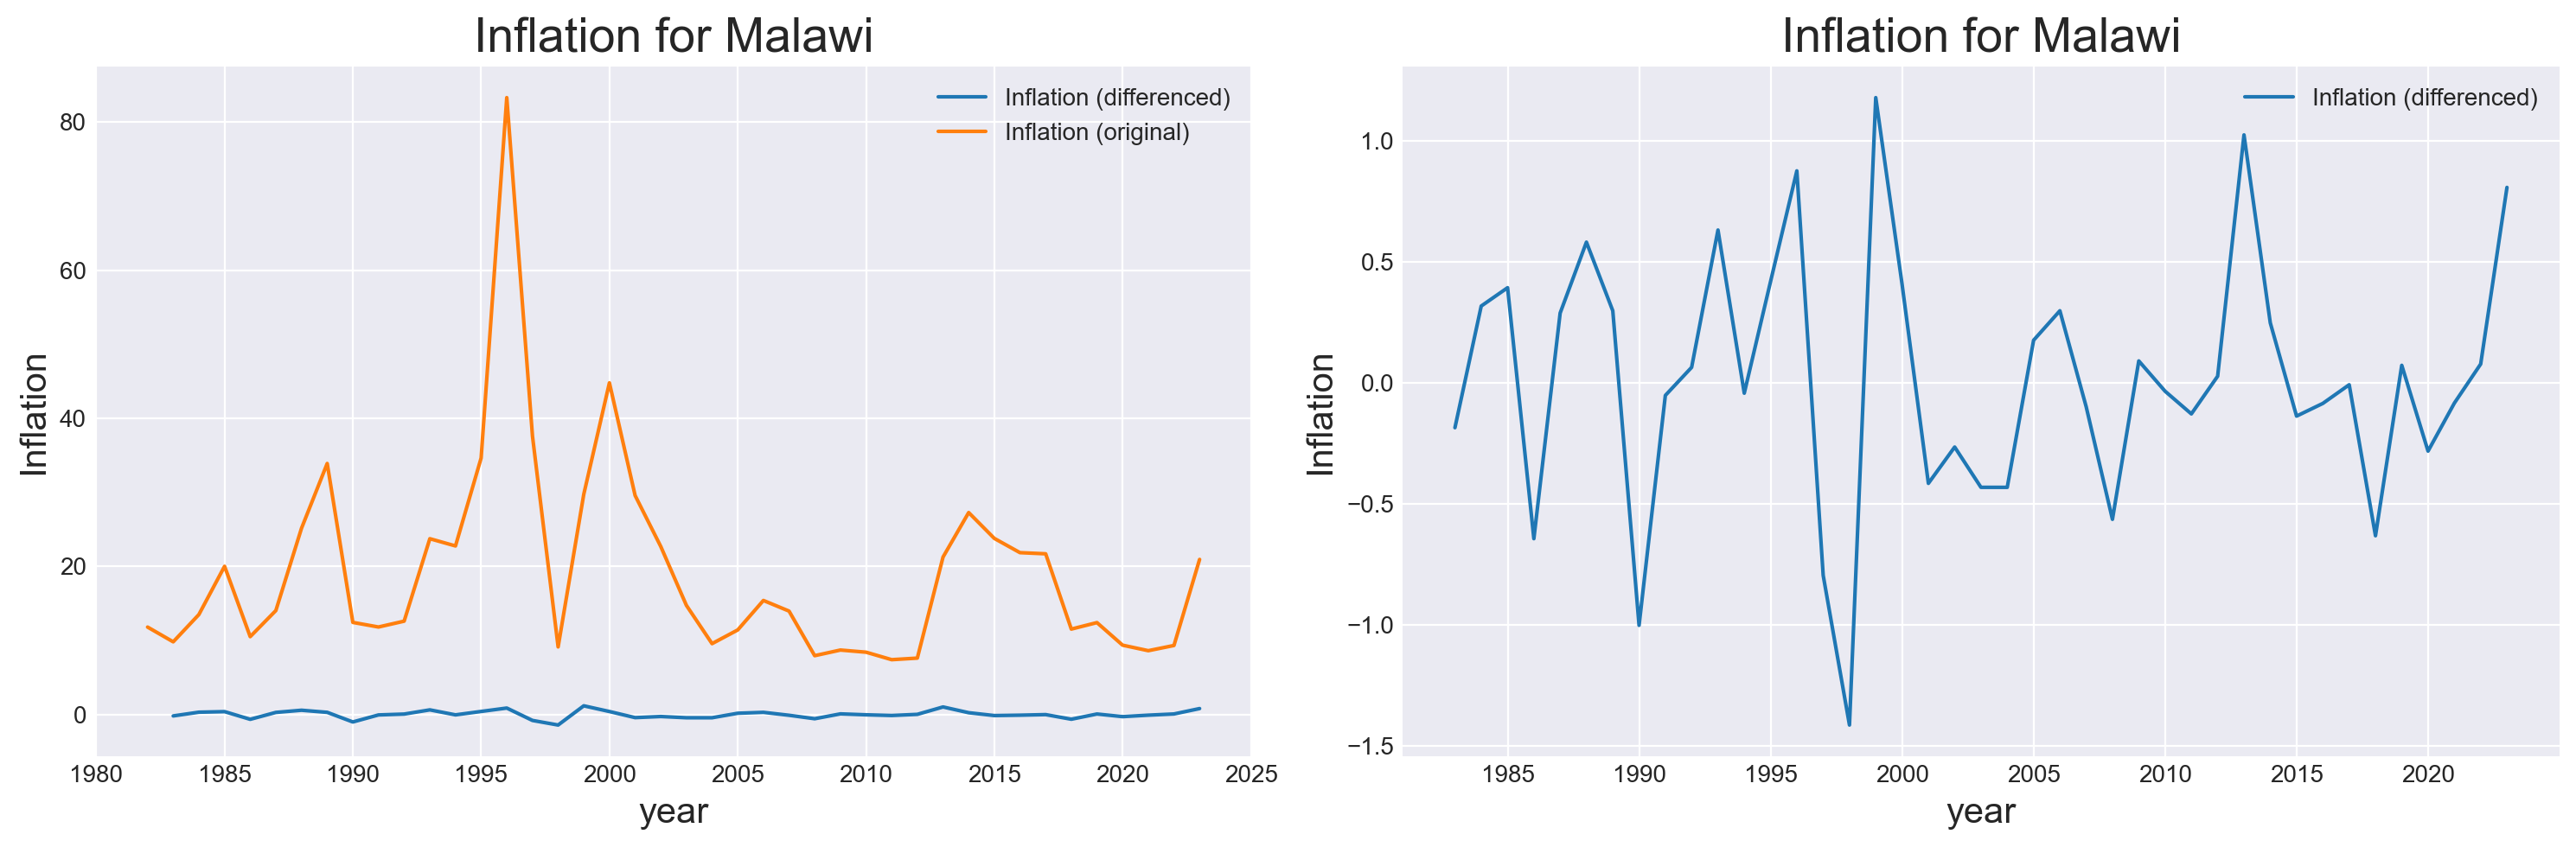

In [26]:
a,(ax,ax2) = plt.subplots(1,2)
ax.plot(infla_mw.Diff,label = 'Inflation (differenced)')
ax.plot(infla_mw.Inflation_rate,label ='Inflation (original)')
ax.set_title('Inflation for Malawi',size = 20)
ax.set_xlabel('year',size = 15)
ax.set_ylabel('Inflation',size =15)
ax.legend()
ax2.plot(infla_mw.Diff,label = 'Inflation (differenced)')
ax2.set_title('Inflation for Malawi',size = 20)
ax2.set_xlabel('year',size = 15)
ax2.set_ylabel('Inflation',size =15)
ax2.legend()
plt.show()

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Checking stationarity (B) </h3>

#### Null hypothesis : Time series is not stationary
#### Alt hypothesis  : Time series is stationary

In [27]:
result2 = adfuller(infla_mw.Diff.dropna())

In [28]:
test_statistic2,p_value2,critical_values2 = result2[0],result2[1],result2[4]

In [29]:
test_statistic2

-6.82676291668896

In [30]:
p_value2 < 0.05

True

In [31]:
critical_values2

{'1%': -3.610399601308181,
 '5%': -2.939108945868946,
 '10%': -2.6080629651545038}

In [32]:
p_value2 < 0.05 # p-value is less than significance value. Therefore, we reject null hypothesis.

True

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:600px'> Plotting ACF and PACF to determine order of ARIMA</h3>

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

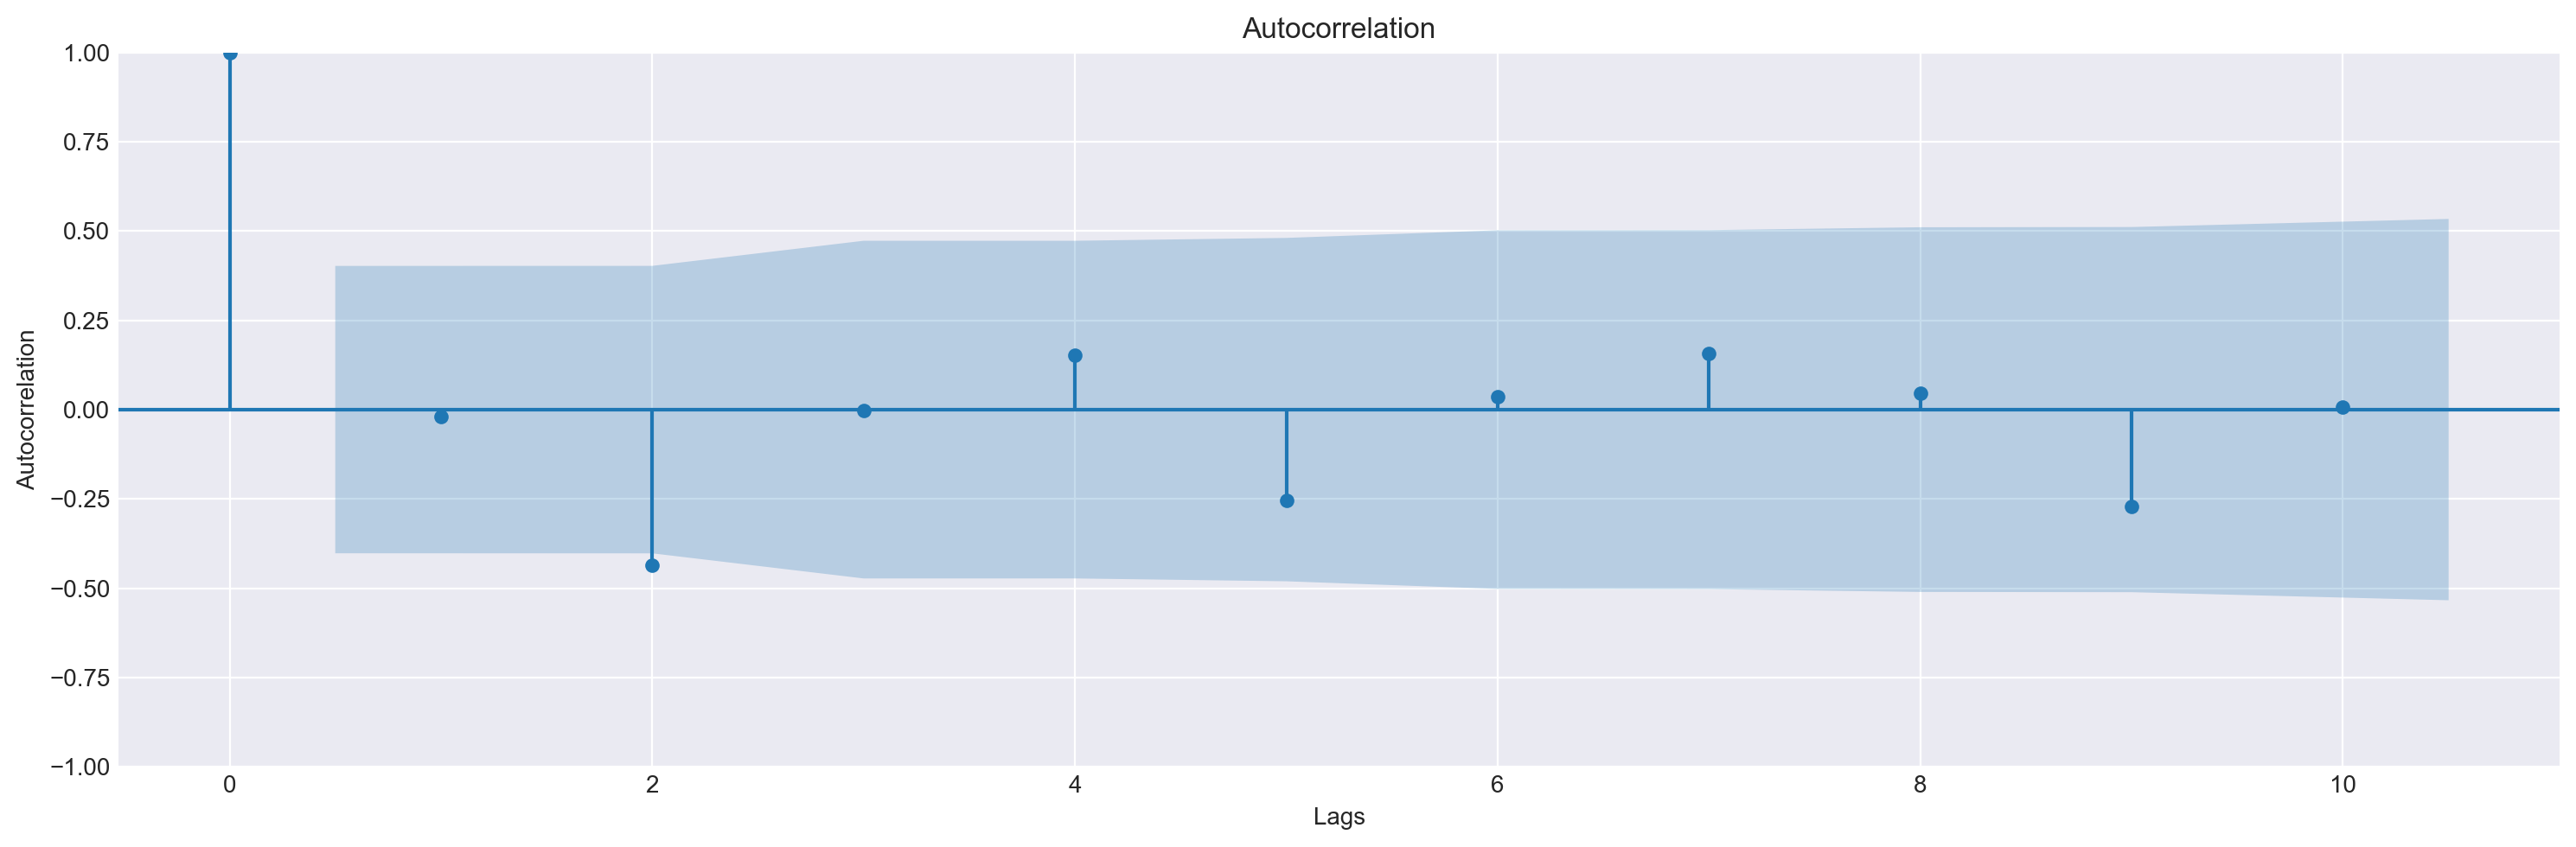

In [34]:
a2,ax2 = plt.subplots(1,1)
plot_acf(infla_mw.Diff.dropna(),alpha = 0.01,lags = 10,ax = ax2)
ax2.set_xlabel('Lags')
ax2.set_ylabel('Autocorrelation')
plt.show()

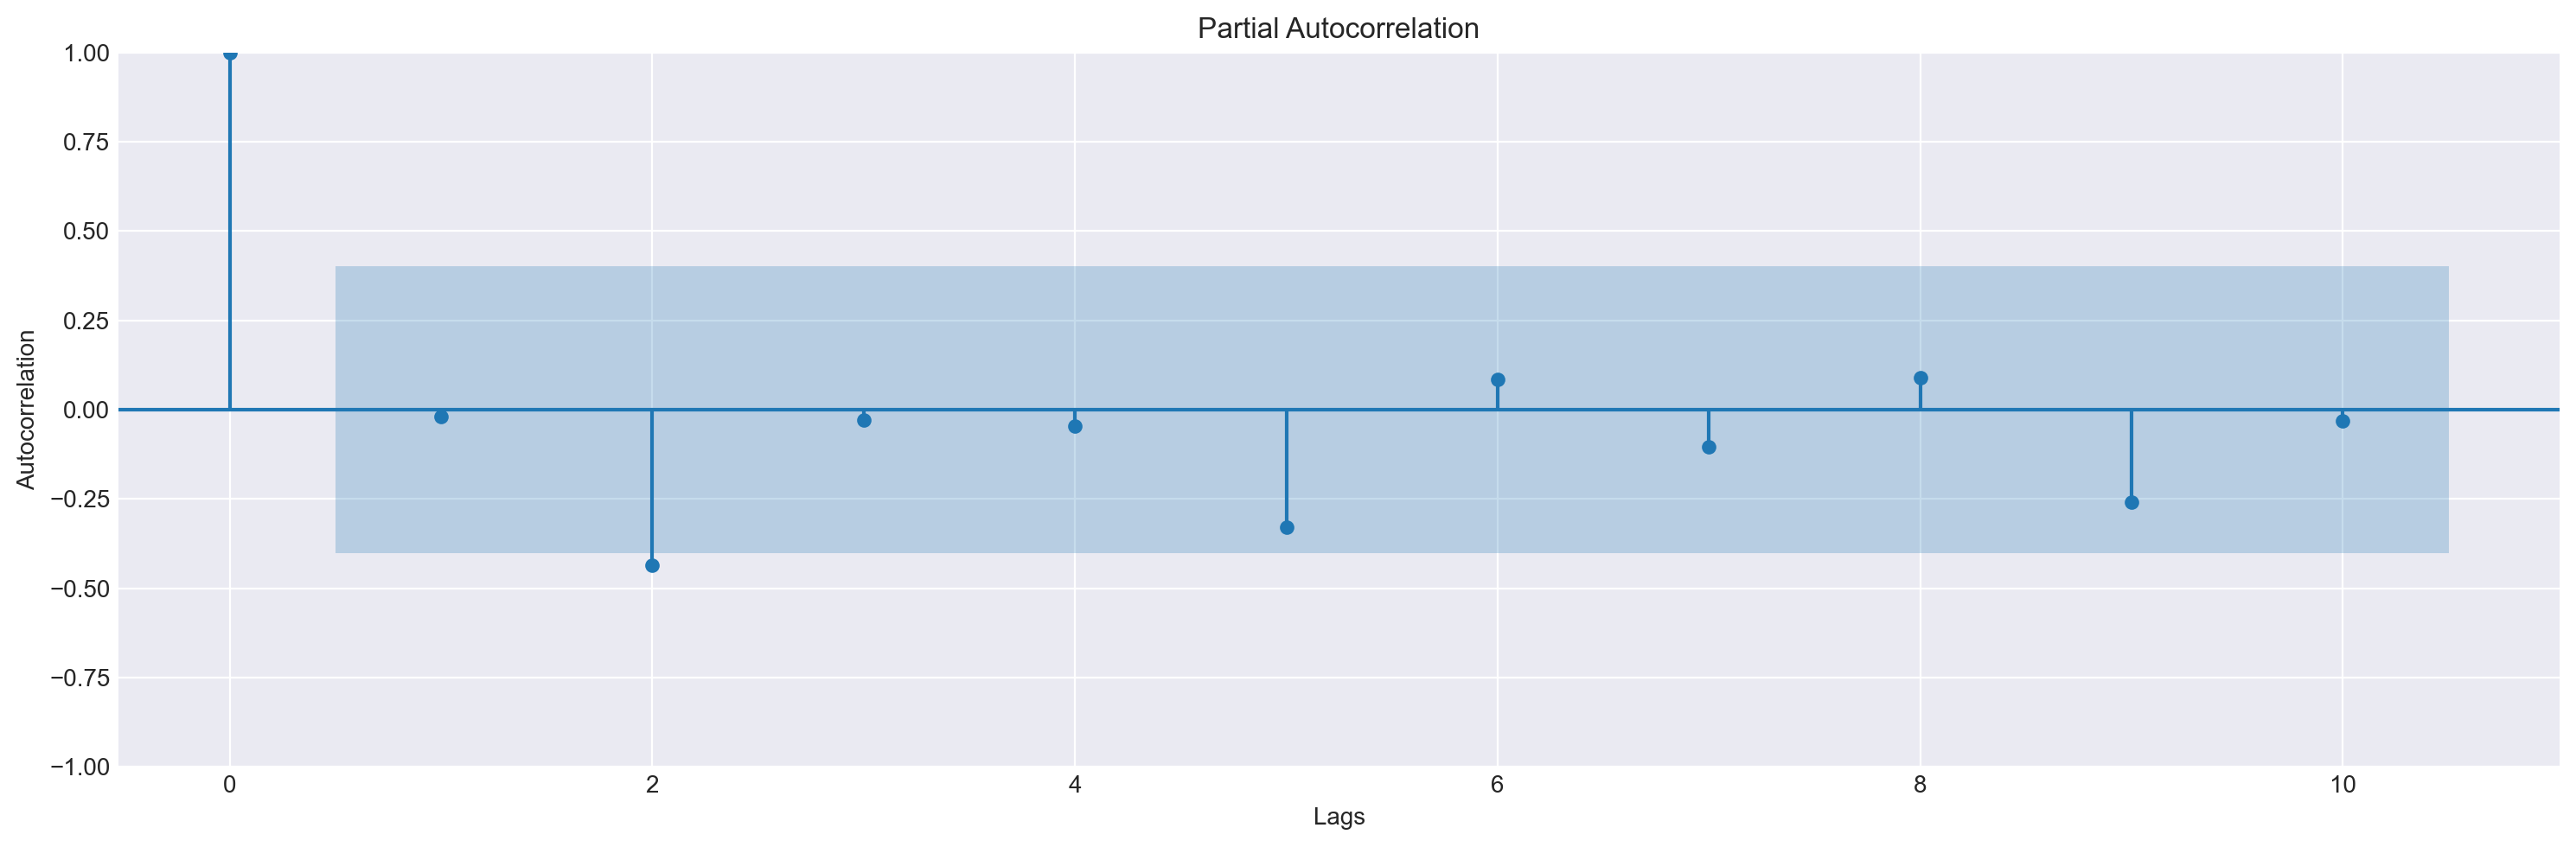

In [35]:
a2,ax3 = plt.subplots(1,1)
plot_pacf(infla_mw.Diff.dropna(),alpha = 0.01,lags = 10,method = 'ywm',ax = ax3)
ax3.set_xlabel('Lags')
ax3.set_ylabel('Autocorrelation')
plt.show()

#### recommending ar(2),ma(2),arma(2,2)

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Estimating the models </h3>

In [36]:
#Estimate the AR (2)
model_2 = sm.tsa.arima.ARIMA(infla_mw['Diff'].dropna(), order=(2, 0, 0))
resid_2 = model_2.fit()
print(resid_2.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   41
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -27.000
Date:                Wed, 08 May 2024   AIC                             62.001
Time:                        10:05:07   BIC                             68.855
Sample:                    12-31-1982   HQIC                            64.497
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.051      0.123      0.902      -0.094       0.107
ar.L1         -0.0284      0.134     -0.212      0.832      -0.292       0.235
ar.L2         -0.4466      0.162     -2.765      0.0

In [37]:
#Estimate the MA (2)
model_02 = sm.tsa.arima.ARIMA(infla_mw['Diff'].dropna(), order=(0, 0, 2))
resid_02 = model_02.fit()
print(resid_02.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   41
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -26.786
Date:                Wed, 08 May 2024   AIC                             61.571
Time:                        10:05:08   BIC                             68.425
Sample:                    12-31-1982   HQIC                            64.067
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.022     -0.093      0.926      -0.044       0.040
ma.L1         -0.2633      0.137     -1.917      0.055      -0.533       0.006
ma.L2         -0.5013      0.142     -3.536      0.0

In [38]:
#Estimate the ARMA (2,2)
model_22 = sm.tsa.arima.ARIMA(infla_mw['Diff'].dropna(), order=(2, 0, 2))
resid_22 = model_22.fit()
print(resid_22.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   41
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -25.619
Date:                Wed, 08 May 2024   AIC                             63.237
Time:                        10:05:09   BIC                             73.519
Sample:                    12-31-1982   HQIC                            66.981
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0065      0.013     -0.486      0.627      -0.033       0.020
ar.L1          0.3542      0.448      0.791      0.429      -0.523       1.231
ar.L2         -0.0787      0.391     -0.201      0.8

In [39]:
#Estimate the MA (4)
model_04 = sm.tsa.arima.ARIMA(infla_mw['Diff'].dropna(), order=(0, 0, 4))
resid_04 = model_04.fit()
print(resid_04.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   41
Model:                 ARIMA(0, 0, 4)   Log Likelihood                 -24.375
Date:                Wed, 08 May 2024   AIC                             60.751
Time:                        10:05:10   BIC                             71.032
Sample:                    12-31-1982   HQIC                            64.495
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0076      0.013     -0.588      0.556      -0.033       0.018
ma.L1         -0.0963     17.044     -0.006      0.995     -33.502      33.309
ma.L2         -0.7469     15.382     -0.049      0.9

#### Conclusion - MA(4) is being considered, it has smallest AIC and BIC

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Model diagnostics </h3>

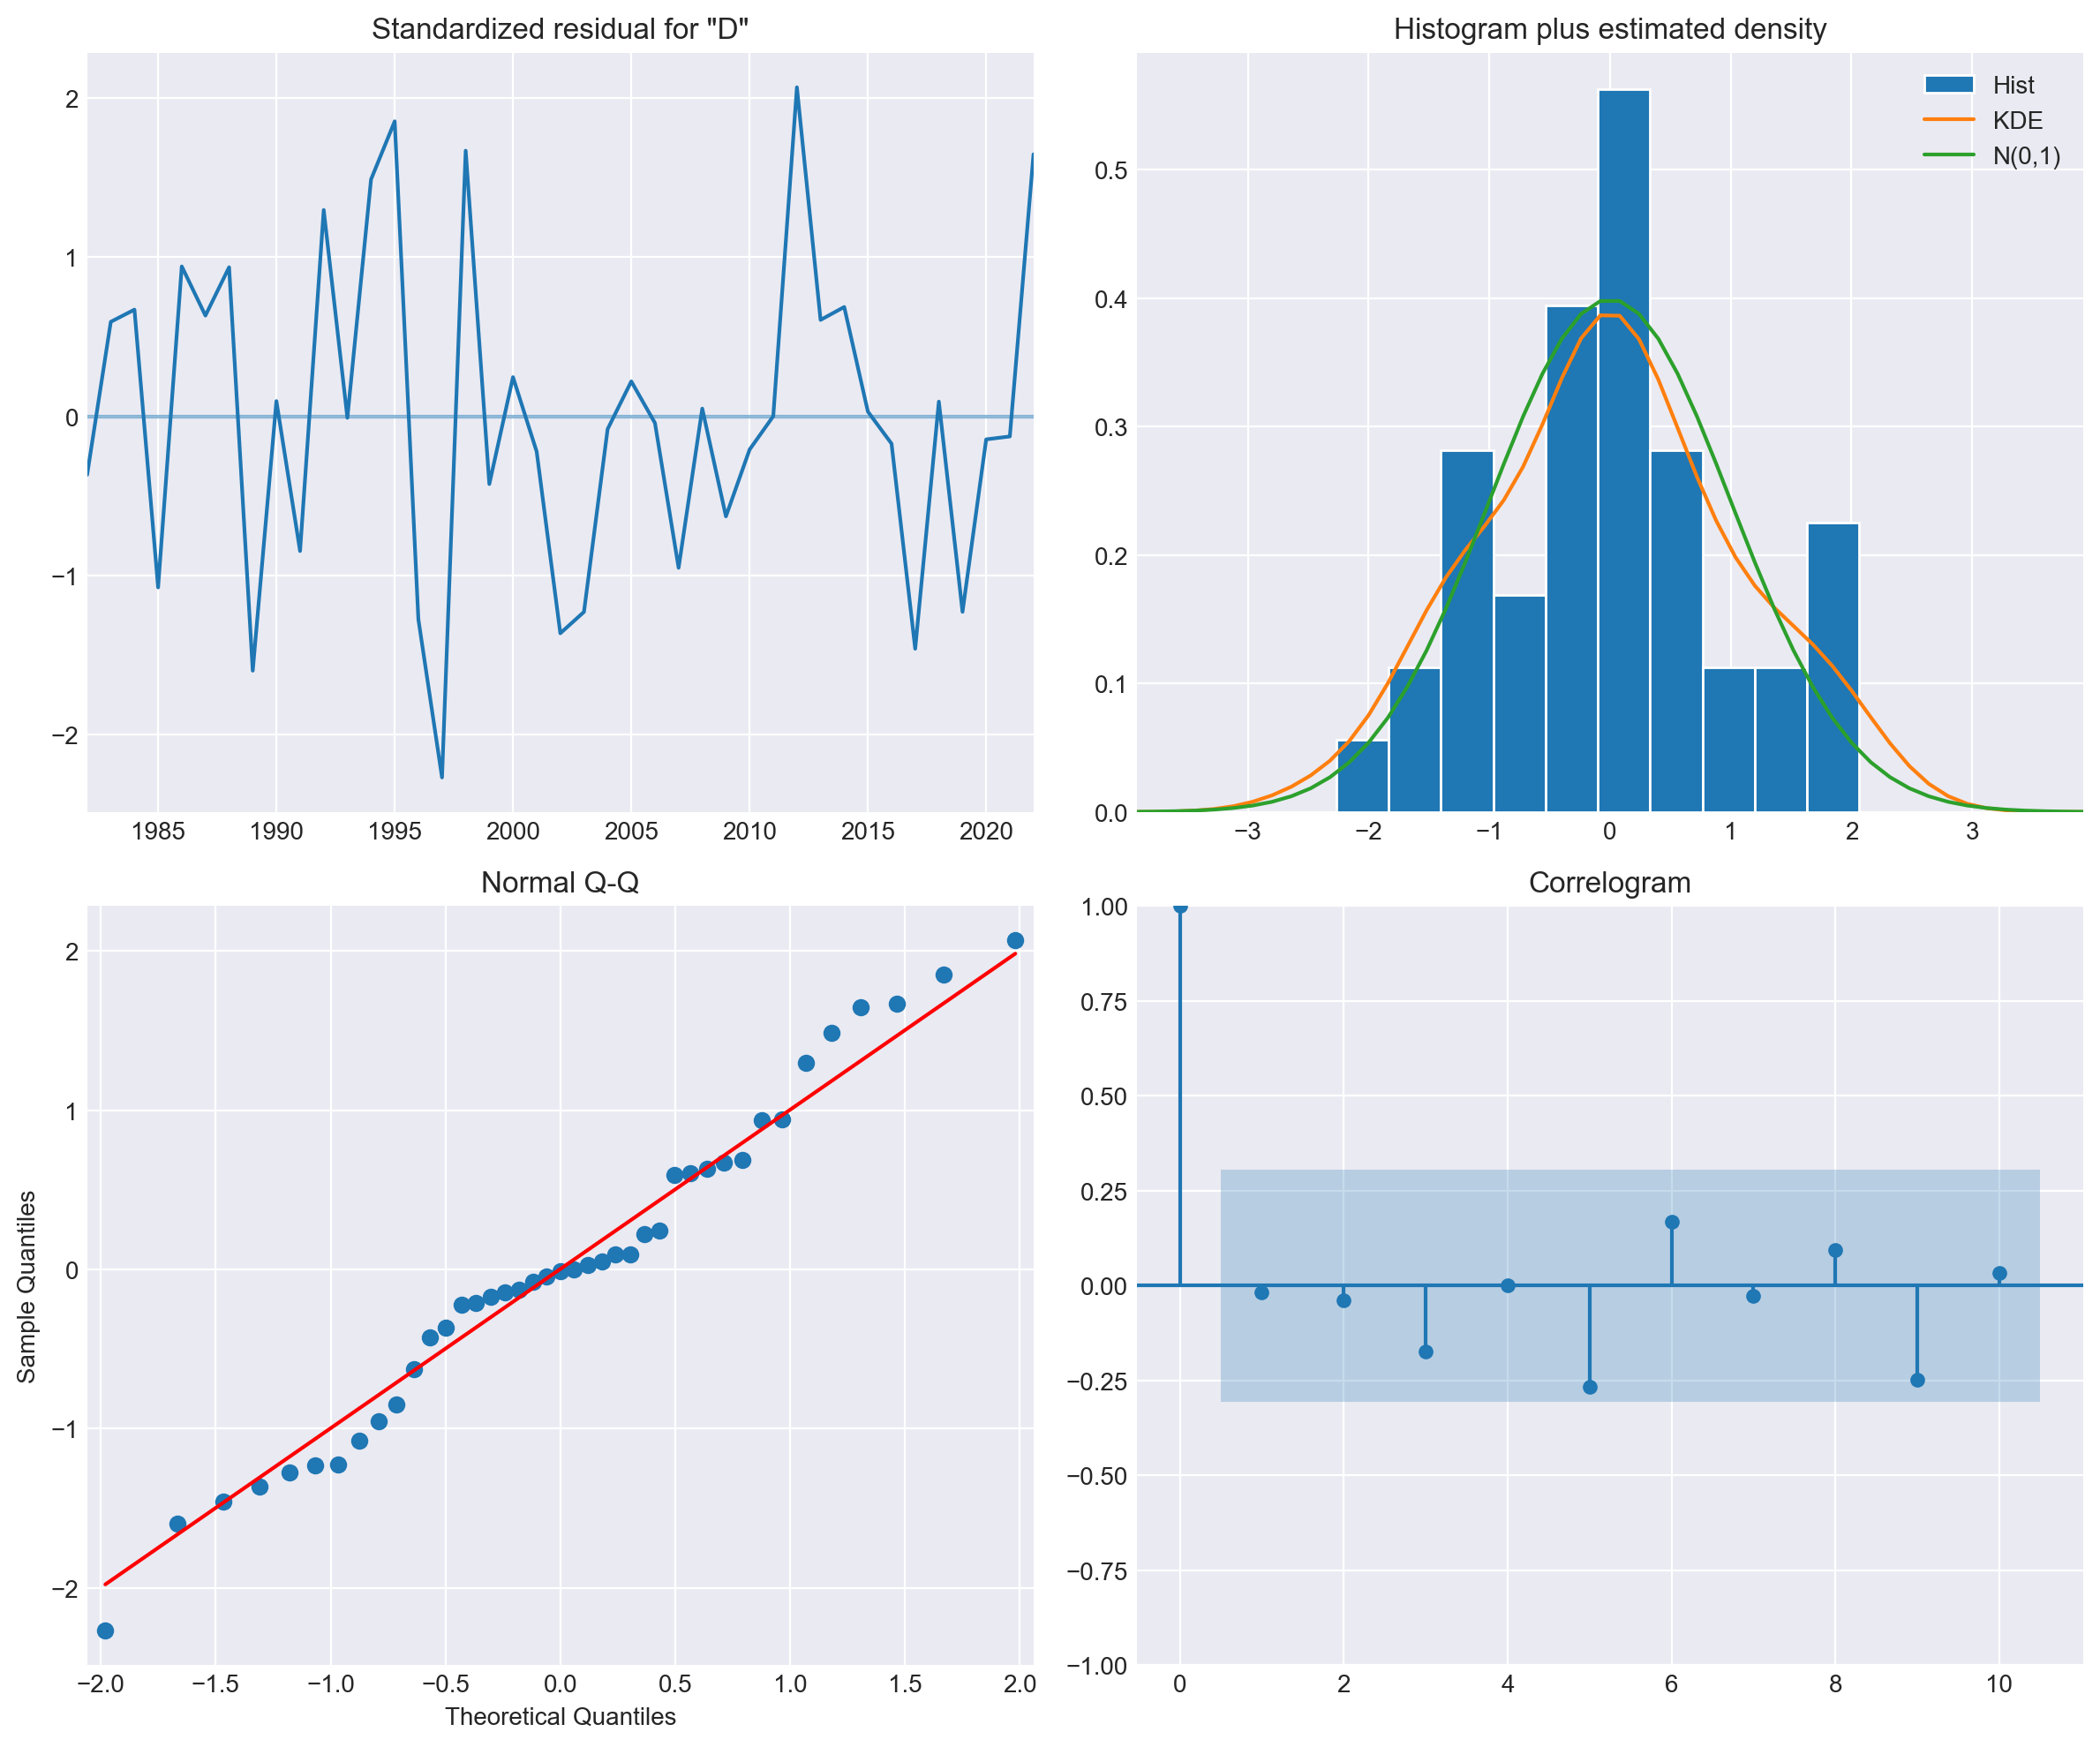

In [40]:
# ar(2) diagnostics

resid_2.plot_diagnostics(figsize=(12,10))
plt.show()

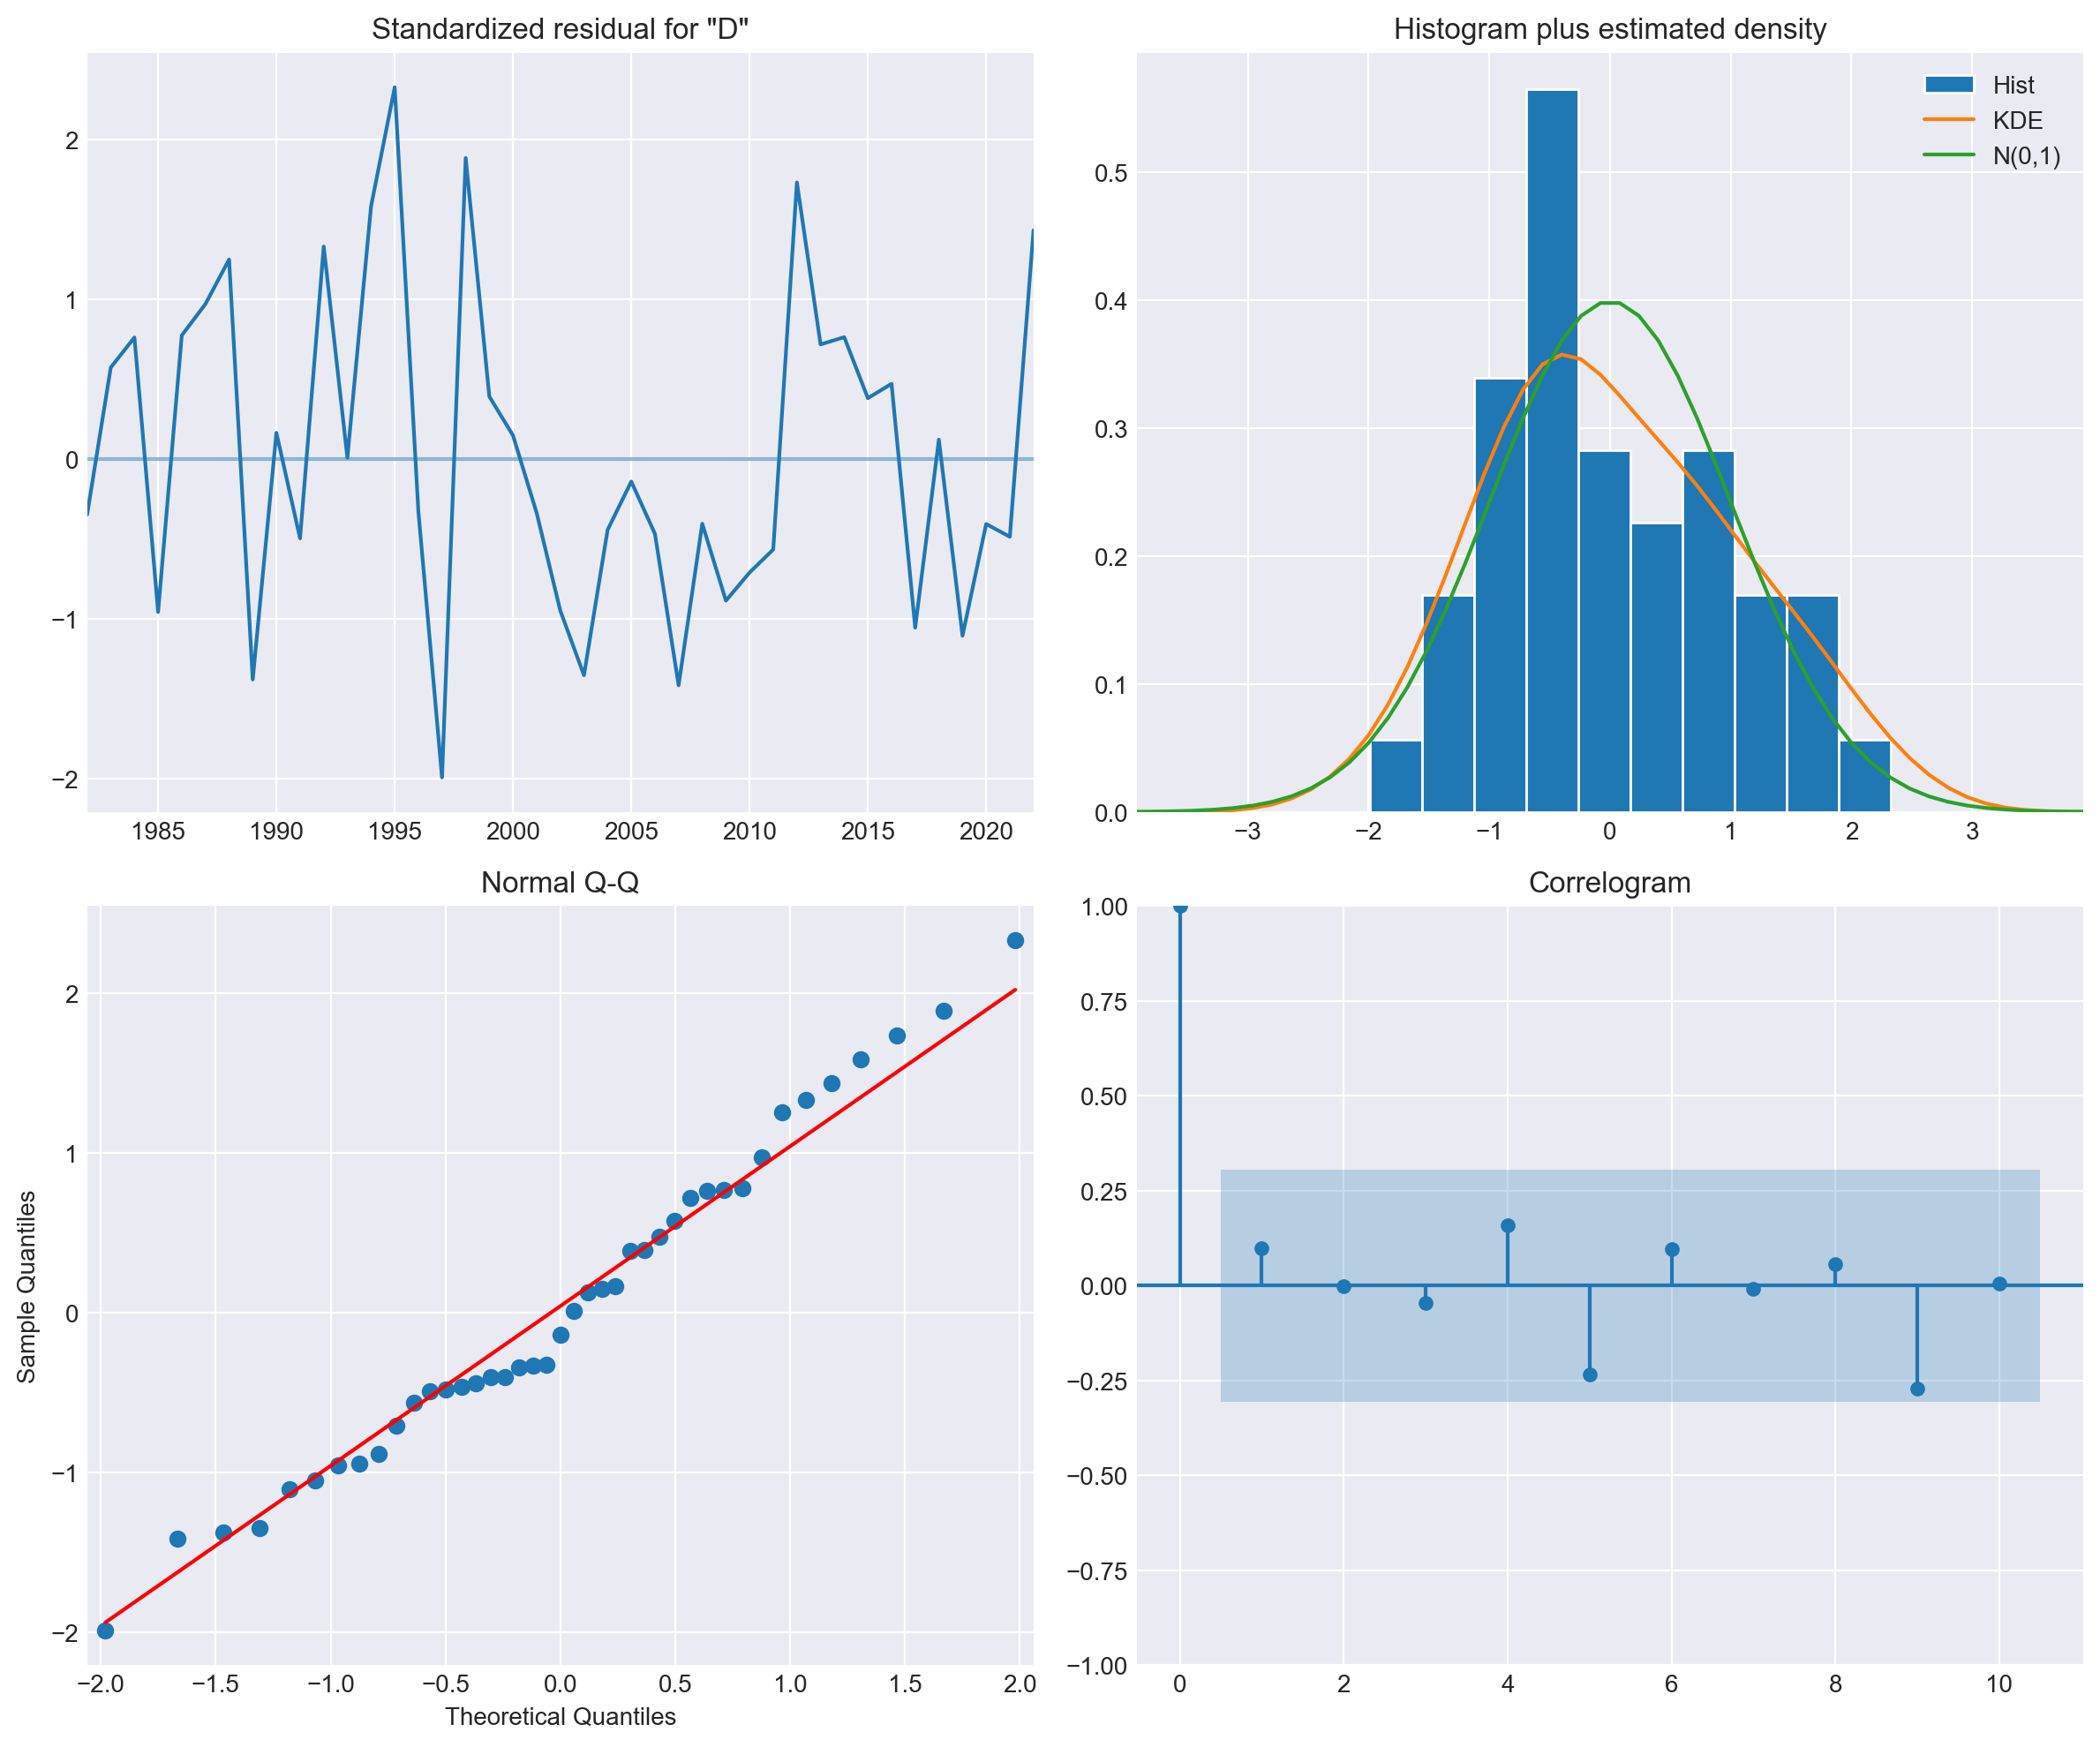

In [41]:
# ma(2) diagnostics
resid_02.plot_diagnostics(figsize=(12,10))
plt.show()

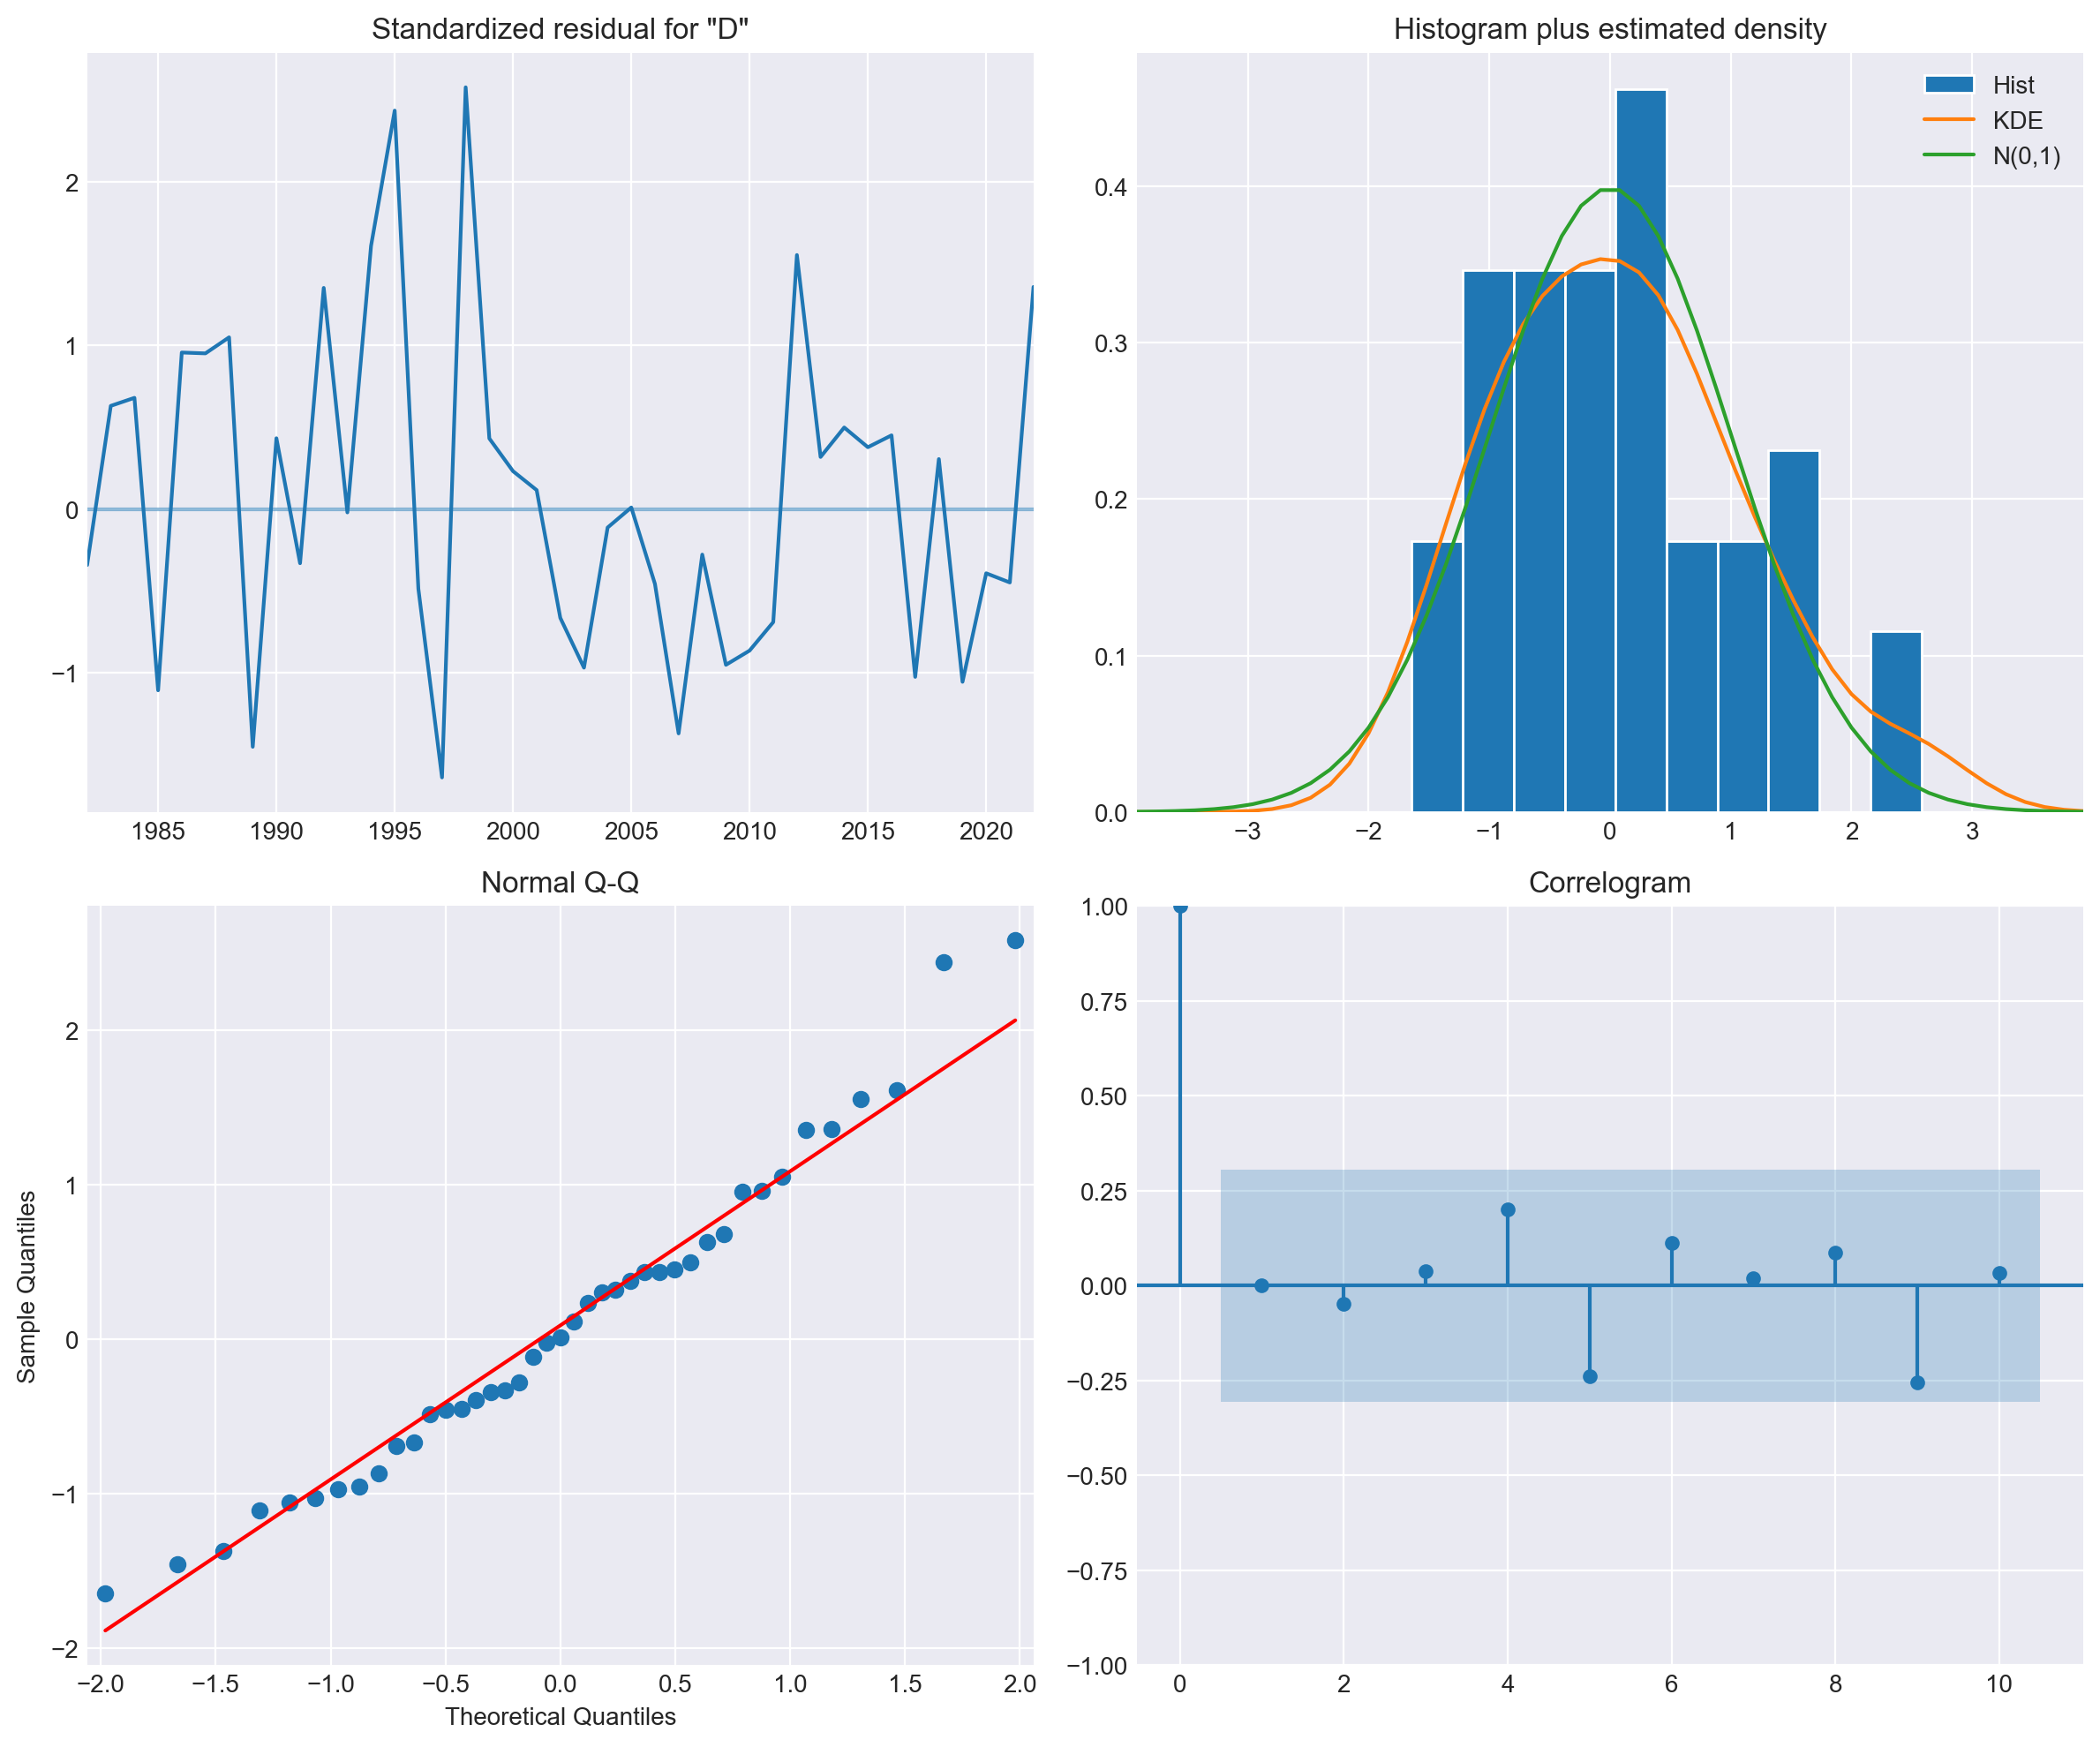

In [42]:
# arma(2,2) diagnostics
resid_22.plot_diagnostics(figsize=(12,10))
plt.show()

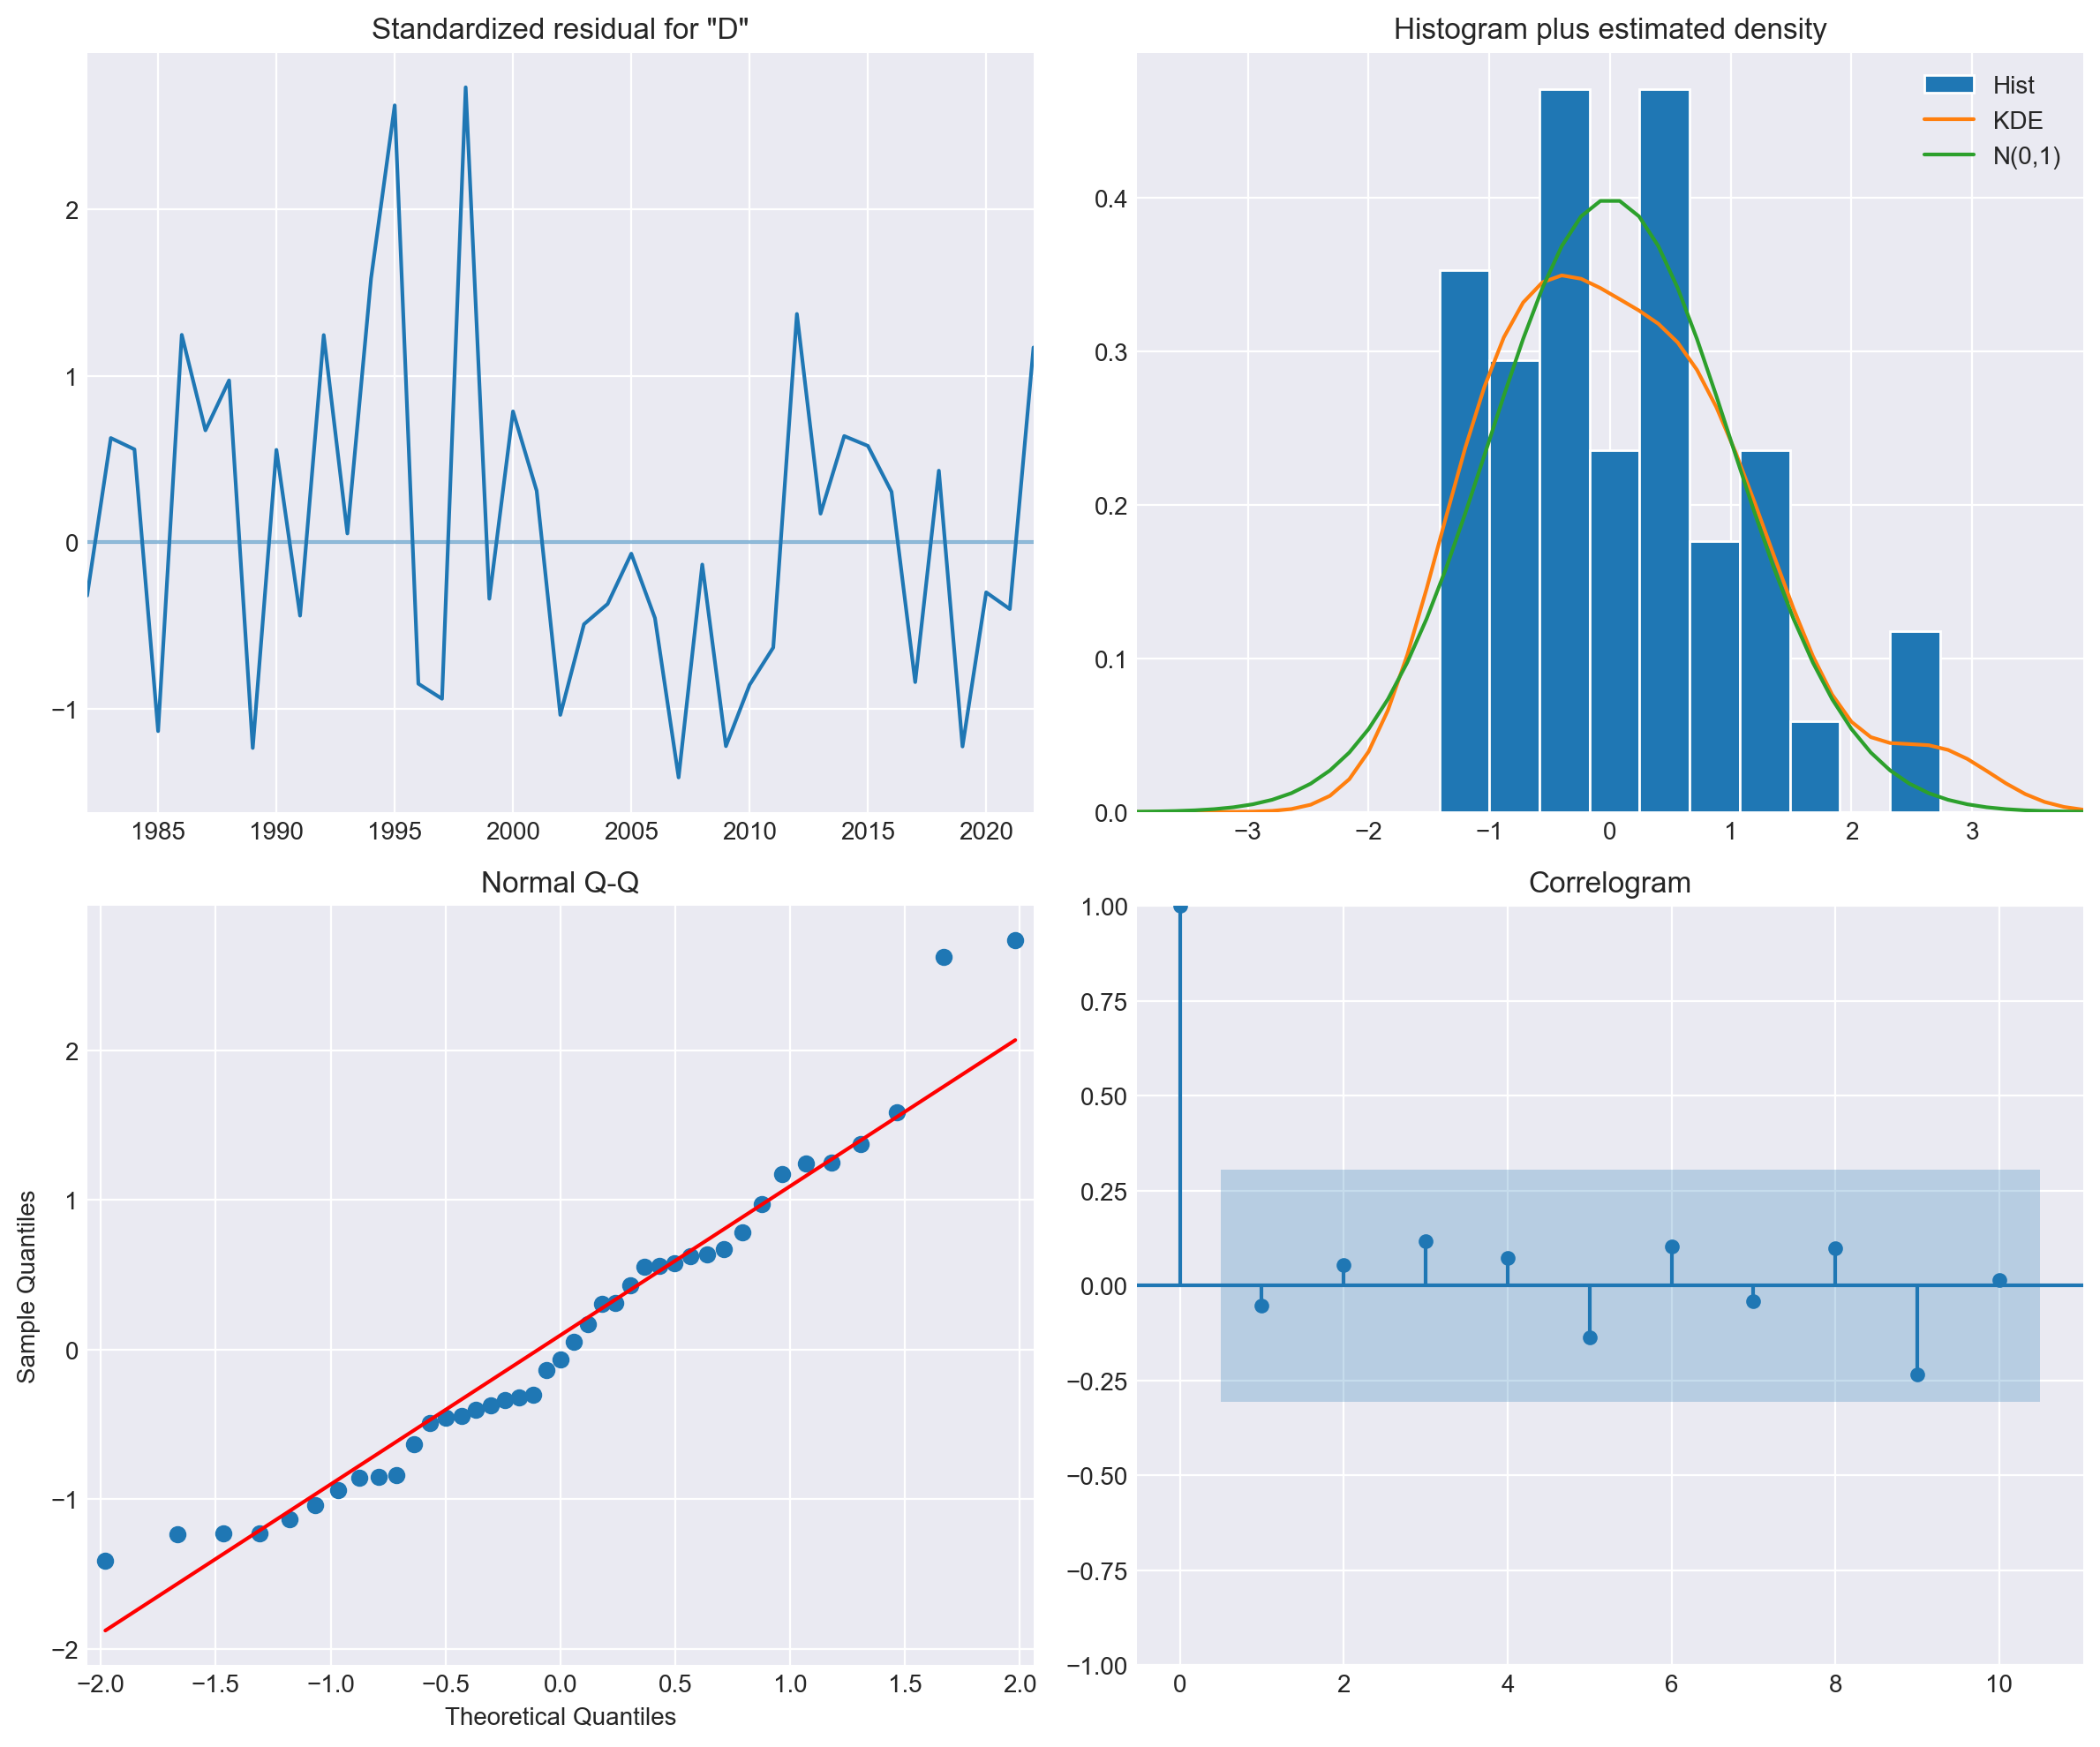

In [43]:
# ma(4) diagnostics
resid_04.plot_diagnostics(figsize=(12,10))
plt.show()

In [44]:
# dropping null values

infla_mw.dropna(inplace = True)

In [45]:
infla_mw.head()

,Inflation_rate,Diff
1982-12-31,9.821162,-0.184805
1983-12-31,13.502511,0.318336
1984-12-31,20.026303,0.394171
1985-12-31,10.518976,-0.643866
1986-12-31,14.046868,0.289219


<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Model forecasting </h3>

In [46]:
# splitting the data and fitting model and perfoming the forecasts

nforecasts = 1
forecasts = {}   

nobs = len(infla_mw.Diff)
n_init_training = int(nobs * 0.8)  

init_training_infla = infla_mw.Diff.iloc[:n_init_training]  
mod = sm.tsa.arima.ARIMA(init_training_infla, order=(0, 0, 4))  
res = mod.fit()

forecasts[init_training_infla.index[-1]] = res.forecast(steps=nforecasts)

for t in range(n_init_training, nobs):
    
    updated_infla = infla_mw.Diff.iloc[t:t+1]
    res = res.append(updated_infla, refit=True)
    
    forecasts[updated_infla.index[0]] = res.forecast(steps=nforecasts)

forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:6, :6])


            2013-12-31  2014-12-31  2015-12-31  2016-12-31  2017-12-31  \
2014-12-31   -0.848548         NaN         NaN         NaN         NaN   
2015-12-31         NaN    0.506713         NaN         NaN         NaN   
2016-12-31         NaN         NaN   -0.551476         NaN         NaN   
2017-12-31         NaN         NaN         NaN    0.331242         NaN   
2018-12-31         NaN         NaN         NaN         NaN    -0.39448   
2019-12-31         NaN         NaN         NaN         NaN         NaN   

            2018-12-31  
2014-12-31         NaN  
2015-12-31         NaN  
2016-12-31         NaN  
2017-12-31         NaN  
2018-12-31         NaN  
2019-12-31    0.687107  


In [47]:
# To remove some null values and reindex

def flatten(column):
    return column.dropna().reset_index(drop=True) 

In [48]:
# Flattening the results
forecast_2 = forecasts.apply(lambda column: column).reindex(forecasts.index) 
flattened2 = forecast_2.apply(flatten)
flattened2.index = (flattened2.index + 1 ).rename('horizon') 
print(flattened2.iloc[:4, :6])

         2013-12-31  2014-12-31  2015-12-31  2016-12-31  2017-12-31  \
horizon                                                               
1         -0.848548    0.506713   -0.551476    0.331242    -0.39448   

         2018-12-31  
horizon              
1          0.687107  


In [49]:
pivoted_forecasts=flattened2.T

pivoted_forecasts

horizon,1
2013-12-31,-0.848548
2014-12-31,0.506713
2015-12-31,-0.551476
2016-12-31,0.331242
2017-12-31,-0.394480
2018-12-31,0.687107
2019-12-31,-0.445540
2020-12-31,0.855969
2021-12-31,-0.470758
2022-12-31,0.364141


In [50]:
infla_forecast=pd.concat([infla_mw,pivoted_forecasts],axis=1)
infla_forecast

,Inflation_rate,Diff,1
1982-12-31,9.821162,-0.184805,NaN
1983-12-31,13.502511,0.318336,NaN
1984-12-31,20.026303,0.394171,NaN
1985-12-31,10.518976,-0.643866,NaN
1986-12-31,14.046868,0.289219,NaN
1987-12-31,25.155095,0.582661,NaN
1988-12-31,33.912165,0.298713,NaN
1989-12-31,12.446362,-1.002345,NaN
1990-12-31,11.823538,-0.051336,NaN
1991-12-31,12.615315,0.064819,NaN


In [51]:
infla_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 1982-12-31 to 2022-12-31
Freq: A-DEC
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Inflation_rate  41 non-null     float64
 1   Diff            41 non-null     float64
 2   1               10 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


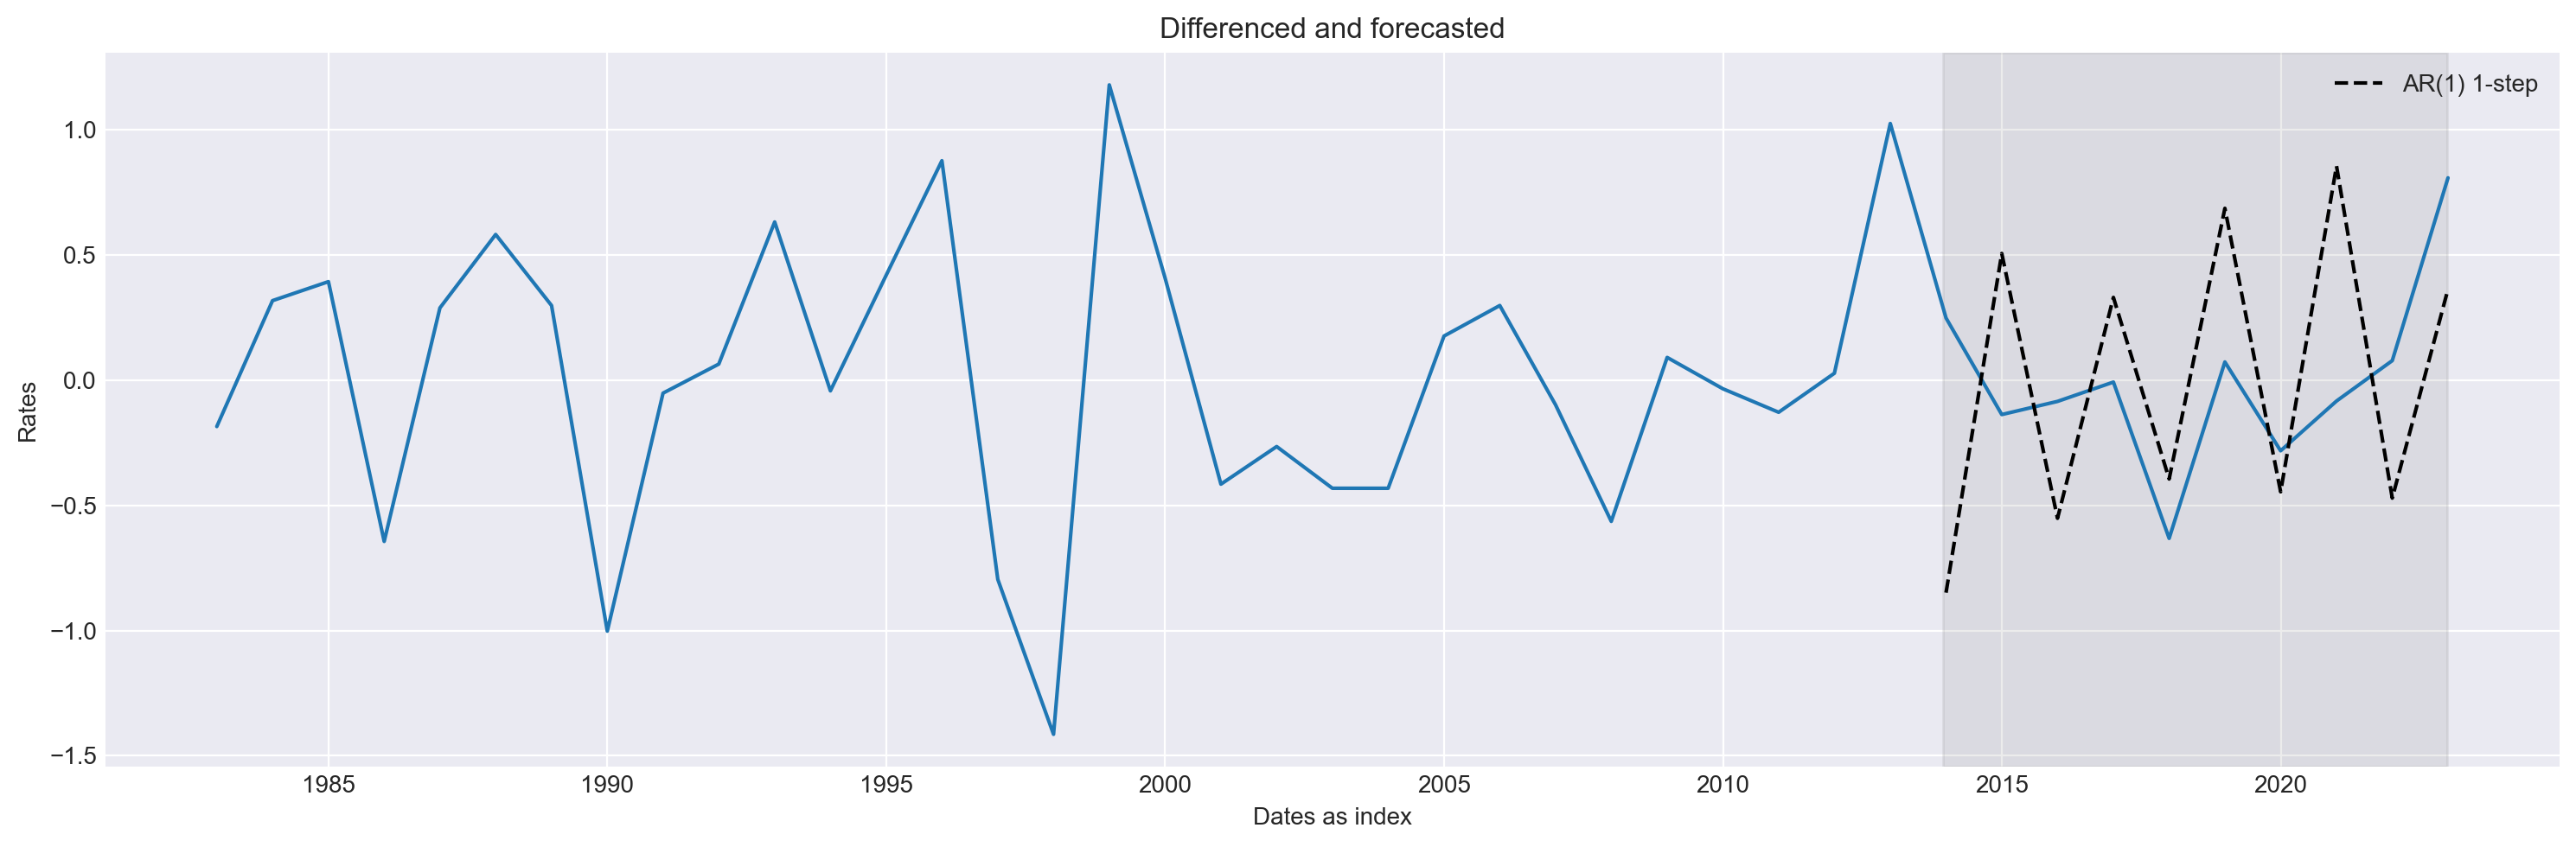

In [52]:
fig, ax4 = plt.subplots()
ax4.plot(infla_forecast['Diff'])
ax4.plot(infla_forecast[1], 'k--', label='AR(1) 1-step')
ax4.set_xlabel('Dates as index')
ax4.set_ylabel('Rates')
ax4.set_title('Differenced and forecasted')
ax4.axvspan(16050, 19350, color='#808080', alpha=0.15)
ax4.legend(loc=1)
plt.show()

In [53]:
# with forecasts for test data
pivoted_forecasts

horizon,1
2013-12-31,-0.848548
2014-12-31,0.506713
2015-12-31,-0.551476
2016-12-31,0.331242
2017-12-31,-0.394480
2018-12-31,0.687107
2019-12-31,-0.445540
2020-12-31,0.855969
2021-12-31,-0.470758
2022-12-31,0.364141


In [54]:
# out-of-sample forecasts
res.forecast(7)

2023-12-31    0.364141
2024-12-31   -1.017301
2025-12-31    0.958226
2026-12-31   -0.605995
2027-12-31   -0.001459
2028-12-31   -0.001459
2029-12-31   -0.001459
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [55]:
# method to transform forecast values to original scale
def to_original_scale(initial_value,column):
    
    original_data = np.r_[initial_value,column].cumsum()
    return np.exp(original_data)

In [56]:
infla_mw.head()

,Inflation_rate,Diff
1982-12-31,9.821162,-0.184805
1983-12-31,13.502511,0.318336
1984-12-31,20.026303,0.394171
1985-12-31,10.518976,-0.643866
1986-12-31,14.046868,0.289219


In [57]:
# differenced data to original scale
to_original_scale(2.469344,infla_forecast.Diff)

array([11.81469387,  9.82115939, 13.50250631, 20.02629697, 10.51897272,
       14.04686358, 25.15508759, 33.91215437, 12.44635817, 11.82353436,
       12.61531145, 23.75134562, 22.77270314, 34.64962536, 83.3257488 ,
       37.60203331,  9.13734958, 29.74864202, 44.80415033, 29.58147925,
       22.69999293, 14.74463002,  9.57679489, 11.42980252, 15.41033986,
       13.97429   ,  7.95220743,  8.71259915,  8.42204165,  7.41158862,
        7.62282025, 21.27125838, 27.28332483, 23.79205754, 21.86734074,
       21.71110645, 11.54339032, 12.42017424,  9.37083314,  8.62551201,
        9.3301412 , 20.9539632 ])

In [58]:
infla_forecast

,Inflation_rate,Diff,1
1982-12-31,9.821162,-0.184805,NaN
1983-12-31,13.502511,0.318336,NaN
1984-12-31,20.026303,0.394171,NaN
1985-12-31,10.518976,-0.643866,NaN
1986-12-31,14.046868,0.289219,NaN
1987-12-31,25.155095,0.582661,NaN
1988-12-31,33.912165,0.298713,NaN
1989-12-31,12.446362,-1.002345,NaN
1990-12-31,11.823538,-0.051336,NaN
1991-12-31,12.615315,0.064819,NaN


In [59]:
# test data forecasts to original scale
forecasts_to_original = pd.Series(to_original_scale(3.057357,pivoted_forecasts[1]))
forecasts_to_original

0     21.271263
1      9.104865
2     15.112490
3      8.706291
4     12.125224
5      8.172770
6     16.247106
7     10.405921
8     24.491944
9     15.295915
10    22.015071
dtype: float64

In [60]:
# out-of-sample forecasts to original scale
forecasts_to_original2 = pd.Series(to_original_scale(3.042328,res.forecast(7)))
forecasts_to_original2 = forecasts_to_original2[1::]
forecasts_to_original2.index = res.forecast(7).index
forecasts_to_original2

2023-12-31    30.158579
2024-12-31    10.904419
2025-12-31    28.428563
2026-12-31    15.508667
2027-12-31    15.486050
2028-12-31    15.463467
2029-12-31    15.440917
Freq: A-DEC, dtype: float64

In [61]:
forecasts_to_original2.to_csv('inflation_forecast.csv')

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Model Evaluation </h3>

In [62]:
# transforming data for evaluation

forecast_errors = forecasts.apply(lambda column: infla_forecast.Diff - column).reindex(forecasts.index)
flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:4, :5])

         2013-12-31  2014-12-31  2015-12-31  2016-12-31  2017-12-31
horizon                                                            
1          0.711624    -0.59107    0.544305   -0.962953    0.467689


In [63]:
# root mean square error (RMSE)
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    0.789557
dtype: float64


In [64]:
# Compute the mean absolute error (MAE)
mae = (abs(flattened).mean(axis=1))

print(mae)

horizon
1    0.740712
dtype: float64
